In [ ]:
print("Unzipping dataset...")
!unzip -o "/content/drive/My Drive/age_prediction.zip" -d /content/
print("Unzipping complete!")

Streaming output truncated to the last 5000 lines.
  inflating: /content/age_prediction/train/070/78332.jpg  
  inflating: /content/age_prediction/train/070/78495.jpg  
  inflating: /content/age_prediction/train/070/78603.jpg  
  inflating: /content/age_prediction/train/070/78950.jpg  
  inflating: /content/age_prediction/train/070/79193.jpg  
  inflating: /content/age_prediction/train/070/79502.jpg  
  inflating: /content/age_prediction/train/070/79589.jpg  
  inflating: /content/age_prediction/train/070/79660.jpg  
  inflating: /content/age_prediction/train/070/79733.jpg  
  inflating: /content/age_prediction/train/070/79774.jpg  
  inflating: /content/age_prediction/train/070/80028.jpg  
  inflating: /content/age_prediction/train/070/80607.jpg  
  inflating: /content/age_prediction/train/070/81012.jpg  
  inflating: /content/age_prediction/train/070/81131.jpg  
  inflating: /content/age_prediction/train/070/81329.jpg  
  inflating: /content/age_prediction/train/070/81604.jpg  
  inf

In [ ]:
import os

DATA_ROOT = "/content/age_prediction"

train_path = os.path.join(DATA_ROOT, "train")
test_path  = os.path.join(DATA_ROOT, "test")

print("Train folder count:", len(os.listdir(train_path)))
print("Test folder count:", len(os.listdir(test_path)))

Train folder count: 100
Test folder count: 100


In [ ]:
from collections import Counter

train_counts = {f: len(os.listdir(os.path.join(train_path, f))) for f in os.listdir(train_path)}
test_counts  = {f: len(os.listdir(os.path.join(test_path, f))) for f in os.listdir(test_path)}

print("Total train images:", sum(train_counts.values()))
print("Train counts (first 10):", list(train_counts.items())[:10])
print("Total test  images:", sum(test_counts.values()))
print("Test counts (first 10):", list(test_counts.items())[:10])

Total train images: 185632
Train counts (first 10): [('067', 685), ('028', 5352), ('043', 4006), ('045', 3789), ('017', 1324), ('037', 4969), ('085', 198), ('033', 5635), ('098', 3), ('023', 4393)]
Total test  images: 47568
Test counts (first 10): [('067', 171), ('028', 1410), ('043', 961), ('045', 961), ('017', 355), ('037', 1333), ('085', 30), ('033', 1474), ('098', 1), ('023', 1120)]


In [ ]:
# Import our main tools
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_DIR = 'age_prediction/train/'
TEST_DIR = 'age_prediction/test/'

In [ ]:
def analyze_data_distribution(directory):
    """This is a helper function to count images in each age sub-folder."""

    age_folders = os.listdir(directory)

    ages = []
    image_counts = []

    for folder in age_folders:
        if folder.isdigit():
            folder_path = os.path.join(directory, folder)
            num_images = len(os.listdir(folder_path))

            ages.append(int(folder))
            image_counts.append(num_images)

    df = pd.DataFrame({'age': ages, 'count': image_counts}).sort_values('age')
    return df

train_df = analyze_data_distribution(TRAIN_DIR)
test_df = analyze_data_distribution(TEST_DIR)


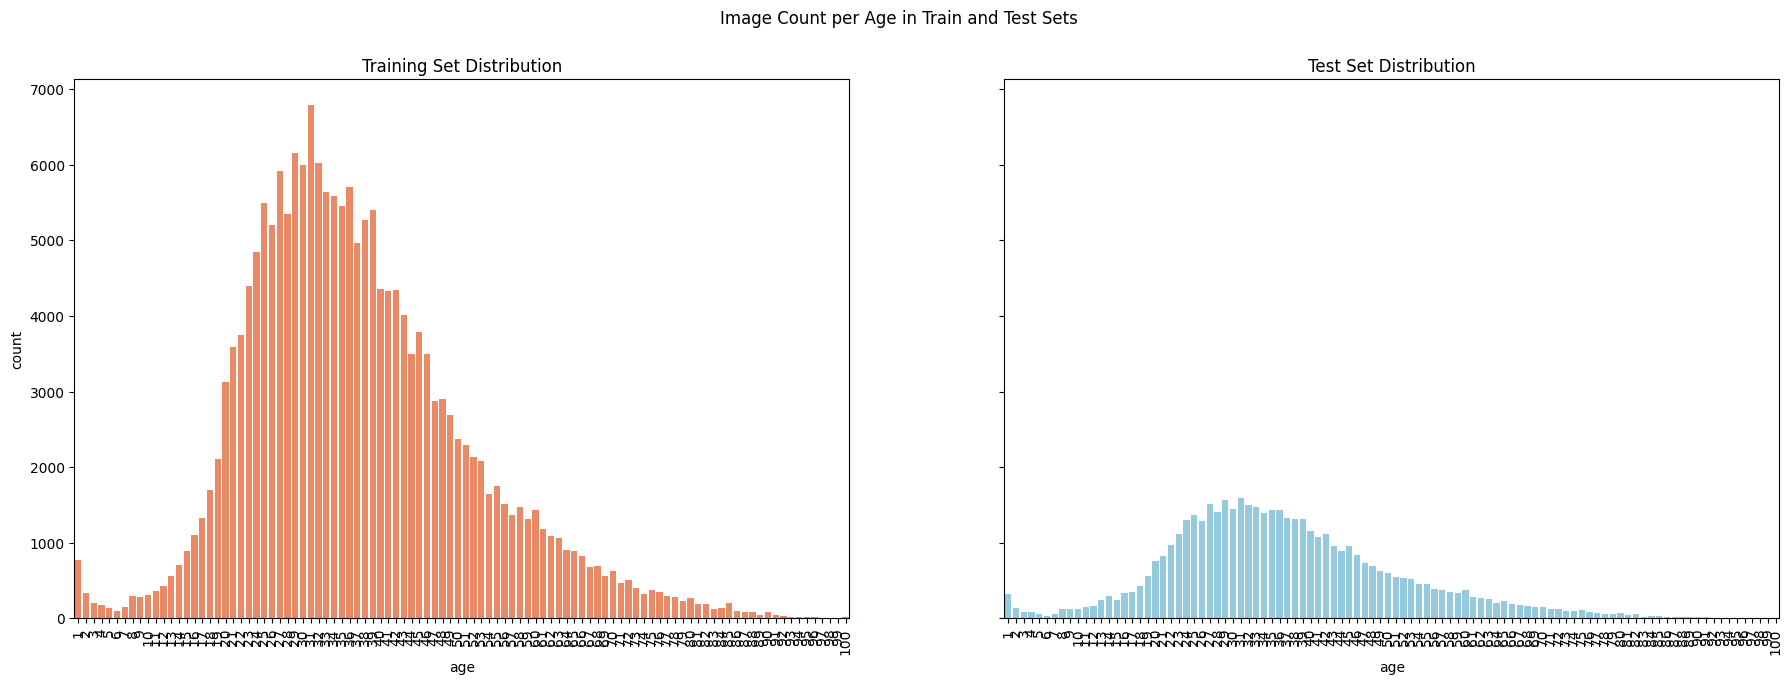

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=True)
fig.suptitle('Image Count per Age in Train and Test Sets')

# --- Chart 1: Training Data ---
sns.barplot(ax=axes[0], x='age', y='count', data=train_df, color='coral')
axes[0].set_title('Training Set Distribution')
axes[0].tick_params(axis='x', rotation=90)

# --- Chart 2: Testing Data ---
sns.barplot(ax=axes[1], x='age', y='count', data=test_df, color='skyblue')
axes[1].set_title('Test Set Distribution')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

#Split the Dataset

#imports

In [ ]:
import os
import random
import shutil
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from google.colab import drive


Augement Define

In [ ]:
# Paths
DATA_ROOT = "/content/age_prediction"
train_path = os.path.join(DATA_ROOT, "train")

final_train_data = "final_train_data"   # New folder to save processed train dataset
os.makedirs(final_train_data, exist_ok=True)

# Params
target_train = 900
img_size = (128, 128)

# Augmentation generator (for oversampling)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

Split - OverSample & UnderSample

In [ ]:
def analyze_data_distribution(directory):
    """Count images in each age sub-folder."""
    ages, image_counts = [], []
    for folder in os.listdir(directory):
        if folder.isdigit():
            folder_path = os.path.join(directory, folder)
            num_images = len(os.listdir(folder_path))
            ages.append(int(folder))
            image_counts.append(num_images)

    df = pd.DataFrame({'age': ages, 'count': image_counts}).sort_values('age')
    return df

def balance_split(original_path, save_path, target_per_class):
    # Reset folder if already exists
    if os.path.exists(save_path):
        shutil.rmtree(save_path)
    os.makedirs(save_path, exist_ok=True)

    for age_class in sorted(os.listdir(original_path)):
        class_path = os.path.join(original_path, age_class)
        if not os.path.isdir(class_path):
            continue

        images = os.listdir(class_path)
        random.shuffle(images)
        class_save_path = os.path.join(save_path, age_class)
        os.makedirs(class_save_path, exist_ok=True)

        # Case 1: Undersample if more than target
        if len(images) >= target_per_class:
            selected = images[:target_per_class]
            for img_file in selected:
                shutil.copy(os.path.join(class_path, img_file), class_save_path)

        # Case 2: Oversample with augmentation if fewer
        else:
            # Copy all existing
            for img_file in images:
                shutil.copy(os.path.join(class_path, img_file), class_save_path)

            needed = target_per_class - len(images)
            idx = 0
            while needed > 0:
                img_file = images[idx % len(images)]
                img = load_img(os.path.join(class_path, img_file), target_size=img_size)
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)

                for batch in datagen.flow(x, batch_size=1):
                    new_file = os.path.join(class_save_path, f"aug_{needed}_{img_file}")
                    array_to_img(batch[0]).save(new_file)
                    break

                needed -= 1
                idx += 1

    print(f"✅ Final balanced dataset created in {save_path} with {target_per_class} images per class")

Zip Convert

In [ ]:
# ---- Run Balancing on TRAIN only ----
balance_split(train_path, final_train_data, target_train)

# Analyze
train_df_bal = analyze_data_distribution(final_train_data)
print("\n📊 Final Balanced Train Data Distribution:")
print("Total balanced train images:", train_df_bal["count"].sum())
print(train_df_bal.head(10))

# ---- Zip and Save to Drive ----
zip_path = "/content/final_train_data.zip"
shutil.make_archive("/content/final_train_data", 'zip', final_train_data)
shutil.move(zip_path, "/content/drive/MyDrive/final_train_data.zip")

print("📦 Final balanced train dataset zipped and saved to Drive ✅")


✅ Final balanced dataset created in final_train_data with 900 images per class

📊 Final Balanced Train Data Distribution:
Total balanced train images: 90000
    age  count
98    1    900
63    2    900
50    3    900
62    4    900
78    5    900
65    6    900
83    7    900
30    8    900
74    9    900
33   10    900
📦 Final balanced train dataset zipped and saved to Drive ✅


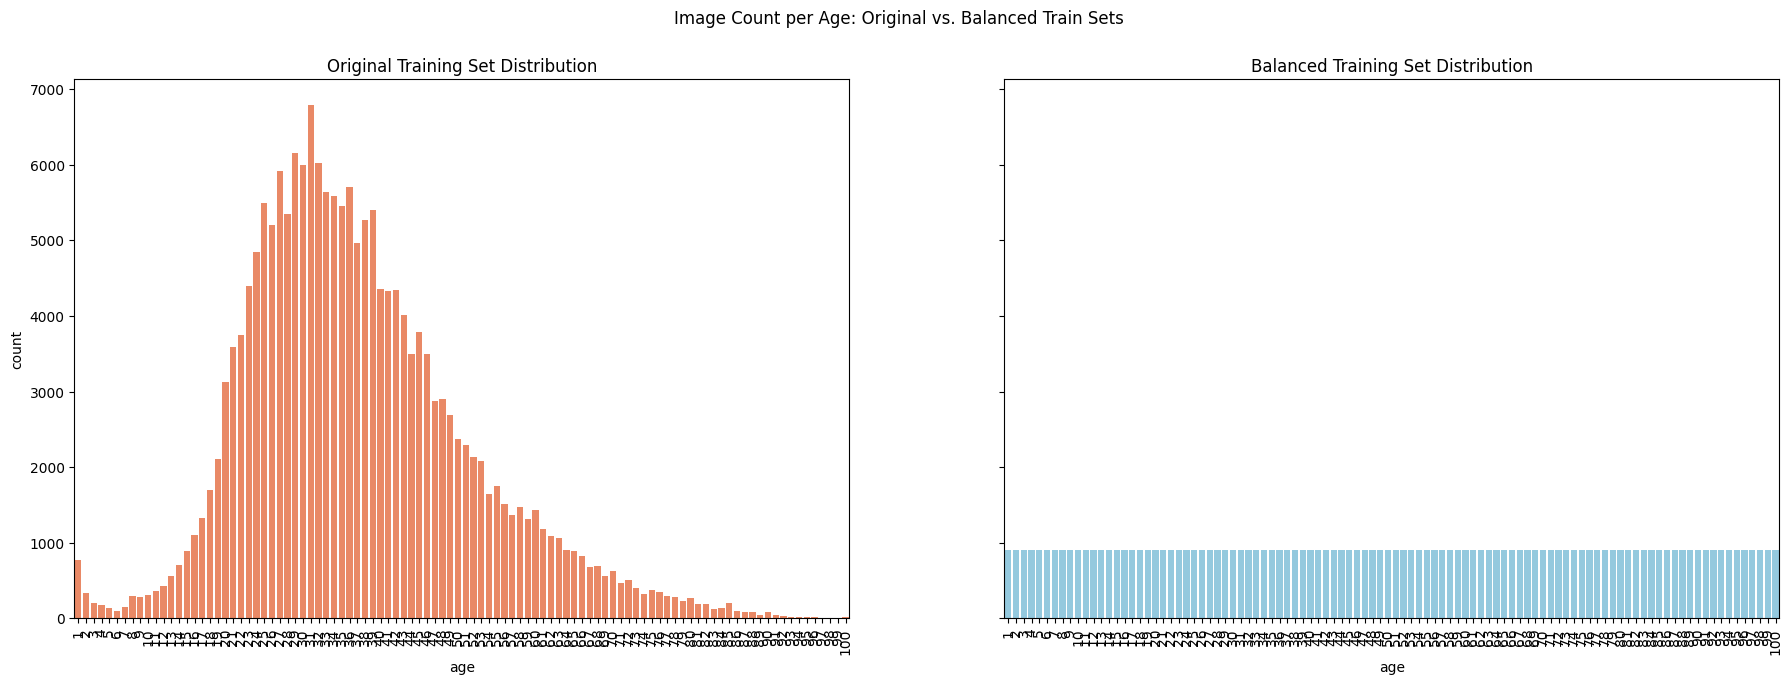

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=True)
fig.suptitle('Image Count per Age: Original vs. Balanced Train Sets')

# --- Chart 1: Original Training Data ---
sns.barplot(ax=axes[0], x='age', y='count', data=train_df, color='coral')
axes[0].set_title('Original Training Set Distribution')
axes[0].tick_params(axis='x', rotation=90)

# --- Chart 2: Balanced Training Data ---
sns.barplot(ax=axes[1], x='age', y='count', data=train_df_bal, color='skyblue')
axes[1].set_title('Balanced Training Set Distribution')
axes[1].tick_params(axis='x', rotation=90)

plt.show()